In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [3]:
# Help me in reading the goodreads_books.json file
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
with open('goodreads_books.json', 'r') as f:
    data = []
    for line in f:
        data.append(json.loads(line))

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Display the columns of the DataFrame
print(df.columns)



         isbn text_reviews_count    series country_code language_code  \
0  0312853122                  1        []           US                 
1  0743509986                  6        []           US                 
2                              7  [189911]           US           eng   
3  0743294297               3282        []           US           eng   
4  0850308712                  5        []           US                 

                                     popular_shelves        asin is_ebook  \
0  [{'count': '3', 'name': 'to-read'}, {'count': ...                false   
1  [{'count': '2634', 'name': 'to-read'}, {'count...                false   
2  [{'count': '58', 'name': 'to-read'}, {'count':...  B00071IKUY    false   
3  [{'count': '7615', 'name': 'to-read'}, {'count...                false   
4  [{'count': '32', 'name': 'to-read'}, {'count':...                false   

  average_rating kindle_asin  ... publication_month edition_information  \
0           4.00       

In [4]:
# print the nooofrows in data frame
print(df.shape[0])  # These are the noof books in the dataset

2360655


## Now let us load the goodreads interactions.csv file and convert it in the required format and store in pickle file 

In [3]:
# read the csv file from goodreads_interactions.csv the fle is in the same directory
interactions = pd.read_csv('goodreads_interactions.csv')
# and print the first few rows of the data frame
print(interactions.head())



   user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0


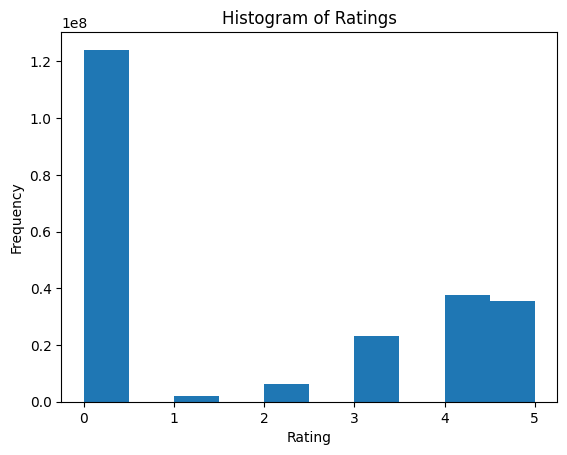

<Figure size 640x480 with 0 Axes>

In [5]:
# Now do the data analysis in the interactions data frame 
# plot the histogram of the ratings
plt.hist(interactions['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()
# save the plot in /results directory create if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/histogram_of_ratings.png')


In [4]:
# check the different ratings in the data frame
print(interactions['rating'].value_counts())

rating
0    124096793
4     37497451
5     35506166
3     23307457
2      6189946
1      2050529
Name: count, dtype: int64


In [3]:
# Plot the noof rows in a data frame
print(interactions.shape[0])  # These are the noof interactions in the dataset

# Now also plot the noof unique users in the dataset
print(interactions['user_id'].nunique())

# Now also plot the noof unique books in the dataset
print(interactions['book_id'].nunique())


228648342
876145
2360650


In [4]:
# Now i want data as a dictionary where keys are dict_keys(['train', 'val', 'test', 'train_indices', 'val_indices', 'test_indices']) and where each value is also a dictionary with keys dict_keys(['user_id', 'book_id', 'rating']) and values are the corresponding data for that split.
# I will use the following code to do this
# First i will split the data into train, val and test
# Then i will convert the data into a dictionary
# Then i will print the data
# Then i will save the data into a pickle file

# Split the data into train, val and test 

# first do a on 100 interactions

# interactions = interactions.sample(100)

train = interactions.sample(frac=0.8)
interactions = interactions.drop(train.index)
val = interactions.sample(frac=0.5)
test = interactions.drop(val.index)

# Convert the data into a dictionary where the key train has a list of dictionaries where each dictionary has keys user_id, book_id and rating
train_data = []
for index, row in train.iterrows():
    train_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
val_data = []
for index, row in val.iterrows():
    val_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
test_data = []  
for index, row in test.iterrows():
    test_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
# Create the dictionary
data = {'train': train_data, 'val': val_data, 'test': test_data, 'train_indices': train.index.tolist(), 'val_indices': val.index.tolist(), 'test_indices': test.index.tolist()}


# save the data into a pickle file
import pickle
with open('goodreads_interactions.pkl', 'wb') as f:
    pickle.dump(data, f)
    
# Load the data from the pickle file
with open('goodreads_interactions.pkl', 'rb') as f:
    data = pickle.load(f)
    
test_data = data['test']
print(len(test_data))

print(test_data[0])


print("Loaded the data from the pickle file successfully!")



22864834
{'user_id': 0, 'book_id': 938, 'rating': 5}
Loaded the data from the pickle file successfully!


In [11]:
data['test'][0]

{'user_id': 266766, 'book_id': 378269, 'rating': 4}

## Now Let us create the txt file for sequential Recommendation where we will have first index as user_id followed by sequence of book_id 

In [5]:
# Now create a sequential_data.txt where each line will have first the user id then the sequence of items that the user has rated
# Finally save the .txt file

# First create a dictionary where the key is the user_id and the value is a list of book_ids that the user has rated
user_to_books = {}
for interaction in data['train']:
    user_id = interaction['user_id']
    book_id = interaction['book_id']
    if user_id not in user_to_books:
        user_to_books[user_id] = []
    user_to_books[user_id].append(book_id)
    
for interaction in data['val']:
    user_id = interaction['user_id']
    book_id = interaction['book_id']
    if user_id not in user_to_books:
        user_to_books[user_id] = []
    user_to_books[user_id].append(book_id)
    
for interaction in data['test']:
    user_id = interaction['user_id']
    book_id = interaction['book_id']
    if user_id not in user_to_books:
        user_to_books[user_id] = []
    user_to_books[user_id].append(book_id)
    
# Now save the data into a .txt file
with open('sequential_data.txt', 'w') as f:
    for user_id, books in user_to_books.items():
        f.write(str(user_id) + ' ' + ' '.join([str(book) for book in books]) + '\n')
        
print("Saved the data into a .txt file successfully!")

Saved the data into a .txt file successfully!


In [6]:
# Now do the data analysis on sequential_data.txt file
# do the analysis of maximim,minimum and average sequence length

def get_max_min_avg_sequence_length(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        max_length = 0
        min_length = float('inf')
        total_length = 0
        for line in lines:
            sequence = line.strip().split(' ')[1:]
            length = len(sequence)
            max_length = max(max_length, length)
            min_length = min(min_length, length)
            total_length += length
        avg_length = total_length / len(lines)
        return max_length, min_length, avg_length
    
max_length, min_length, avg_length = get_max_min_avg_sequence_length('sequential_data.txt')
print('Max length:', max_length)
print('Min length:', min_length)
print('Average length:', avg_length)



Max length: 119777
Min length: 1
Average length: 260.97089180443874


In [8]:
# Print one line in sequential_data.txt

with open('sequential_data.txt', 'r') as f:
    
    for i in range(1):
        print(f.readline())
        
# check noof rows in sequential_data.txt
with open('sequential_data.txt', 'r') as f:
    lines = f.readlines()
    print(len(lines))
    
        

2877 50274 36554 1003 39882 36605 1473 21885 7436 36991 57405 67617 383713 50365 1402 18871 232 134955 18724 41765 13353 1045 21862 39861 16737 1846 3705 317 82017 19484 20570 1551 12517 5864 57185 75727 7193 330520 36296 36513 383714 92049 6973 383703 48613 5121 8381 1605 23738 998 9038 4469 7342 112006 103983 26362 5166 112965 51640 117900 19419 4362 37378 50893 6969 13488 50901 383712 41896 1271 52748 257103 5836 1053 19415 57302 6839 383702 375775 50359 36272 37626 299730 113452 17248 1504 50259 52431 2577 145446 7161 14828 35861 7049 27455 37063 36537 1505 7499 57178 1821 297 35659 16826 16323 23417 39820 1234 57168 21865 2402 51564 259710 19436 1065 17988 50538 858 134776 39811 21477 7510 103554 36607 26601 5868 1611 8673 36908 7071 1210 52430 14713 62689 19431 6974 62453 26032 294203 98487 4748 20906 50370 37024 5422 6259 7492 22856 48616 6230 176486 1823 2295 383716 57161 938 220505 37506 1555 6716 46517 19590 7469 18696 52432 2867 5236 15450 7009 19456 23413 1592 1572 7452 106

In [9]:
# Now sort the data in the sequential_data.txt file based on the user_id
# and save the data into a new file called sequential_data_sorted.txt

with open('sequential_data.txt', 'r') as f:
    lines = f.readlines()
    lines.sort(key=lambda x: int(x.split(' ')[0]))
    
with open('sequential_data_sorted.txt', 'w') as f:
    for line in lines:
        f.write(line)
        
print("Sorted the data in the file successfully!")

Sorted the data in the file successfully!


In [10]:
# Now print the first few lines of the sorted file
with open('sequential_data_sorted.txt', 'r') as f:
    for i in range(5):
        print(f.readline())
        
        

0 583 582 75 239 54 657 827 270 456 586 301 139 156 723 517 720 909 596 944 776 626 314 719 908 842 47 293 649 937 674 579 880 211 540 260 78 769 264 700 145 35 761 83 148 788 932 655 55 762 266 892 823 646 734 61 219 379 415 824 697 358 783 385 801 656 812 740 744 849 431 275 759 500 809 550 585 164 176 936 603 622 508 367 895 71 184 758 572 353 414 845 861 104 859 30 5 98 400 862 803 395 261 800 182 504 782 299 73 941 19 470 45 381 900 153 259 869 947 676 922 311 144 514 594 212 571 374 286 410 584 728 521 430 581 498 792 929 501 811 238 163 773 154 516 488 194 375 660 33 66 273 608 220 110 435 77 440 838 627 256 371 878 11 324 12 727 648 417 907 68 183 402 699 591 350 67 99 659 466 112 565 664 128 446 296 43 539 888 882 173 204 787 666 303 36 702 772 248 477 625 615 831 711 683 606 187 234 447 846 833 298 121 394 138 614 721 10 241 267 151 885 254 760 315 237 355 903 423 855 524 269 46 457 921 268 123 169 225 799 605 668 283 141 857 62 644 600 653 202 919 623 515 9 717 948 868 636 3

# Now let us do the analysis on pkl filde

In [6]:
# Load the goodreads_interactions.pkl file 
import pickle
with open('goodreads_interactions.pkl', 'rb') as f:
    data = pickle.load(f)
    


    

average rating in train_data is 1.801311521643766
average rating in test_data is 1.8014939885415306
average rating in val_data is 1.801414783942888


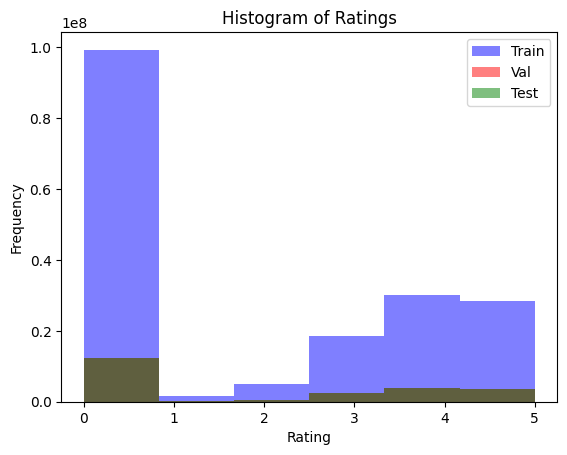

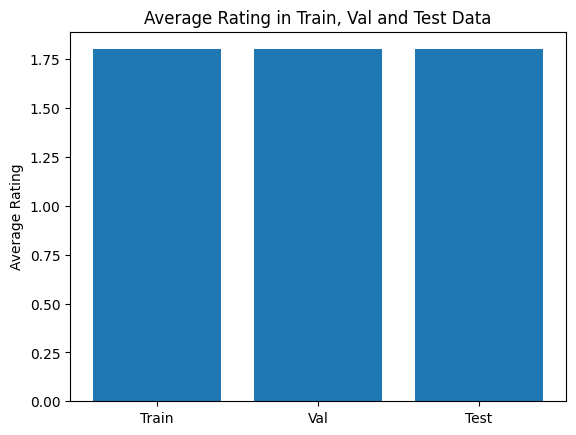

<Figure size 640x480 with 0 Axes>

In [12]:
# Now do the rating analysis on the data['train'] , data['val'] and data['test'] data
train_data = data['train']
val_data = data['val']
test_data = data['test']

# First get the average rating in the train data
train_ratings = [interaction['rating'] for interaction in train_data]
test_ratings = [interaction['rating'] for interaction in test_data]
val_ratings = [interaction['rating'] for interaction in val_data]

train_avg_rating = sum(train_ratings) / len(train_ratings)
test_avg_rating = sum(test_ratings) / len(test_ratings)
val_avg_rating = sum(val_ratings) / len(val_ratings)

print(f'average rating in train_data is {train_avg_rating}')
print(f'average rating in test_data is {test_avg_rating}')
print(f'average rating in val_data is {val_avg_rating}')


# plot the histogram of the ratings
plt.hist(train_ratings, bins=6, alpha=0.5, label='Train',color='magenta')
plt.hist(val_ratings, bins=6, alpha=0.5, label='Val',color='darkred')
plt.hist(test_ratings, bins=6, alpha=0.5, label='Test',color='darkgreen')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.legend()
plt.show()
plt.savefig('results/histogram_of_ratings_train_val_test.png')

# Plot the average rating in the train, val and test data
plt.bar(['Train', 'Val', 'Test'], [train_avg_rating, val_avg_rating, test_avg_rating])
plt.ylabel('Average Rating')
plt.title('Average Rating in Train, Val and Test Data')
plt.show()
plt.savefig('results/average_rating_train_val_test.png')


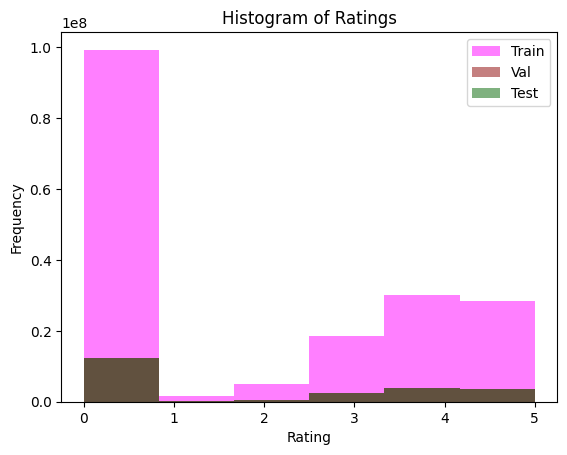

<Figure size 640x480 with 0 Axes>

In [13]:
plt.hist(train_ratings, bins=6, alpha=0.5, label='Train',color='magenta')
plt.hist(val_ratings, bins=6, alpha=0.5, label='Val',color='darkred')
plt.hist(test_ratings, bins=6, alpha=0.5, label='Test',color='darkgreen')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.legend()
plt.show()
plt.savefig('results/histogram_of_ratings_train_val_test.png')